First I import the needed libraries:

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

I read the data into **pandas dataframe** and seperate the training set.
Then I calculate the **mean** of each column (feature), and subtract it from the dataset so that the dataset is **centered on the origin**.
Then I calculate the **covariance matrix** of the mean-centered data, and compute the eigenvalues and eigenvectors for the calculated matrix.
Finally I sort the eigenvalues in the **descending** order along with their corresponding eigenvector.

In [12]:
df = pd.read_csv("/Users/Nika/Desktop/ML_HW5/fer2013.csv")
data = np.array(list(map(str.split, df.pixels)), np.float32) 

In [5]:
images_mean = np.mean(data, axis=0)
images_mean_centered = data - images_mean
cov = np.cov(images_mean_centered, rowvar = False)
eigenvalues, eigenvectors = np.linalg.eig(cov)
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:,sorted_index]

**PART A:**
I print the eigenvalues in the descending order as below.
For choosing the number of principle components, I use cumulative variance ratio and by evaluating it we can preserve the information of original data. The choice of k is done by selection of the smallest values of k, which has a variance ratio higher than a specific threshold, 99% for example.

In [6]:
print(sorted_eigenvalues)

[2.66512419e+06 9.03136454e+05 8.68414943e+05 ... 4.29082479e+00
 4.17553368e+00 3.85456269e+00]


**PART B:**
I choose the **first 4** eigenvalues in the descending order and their corresponding eigenvector as below.
The eigenvectors and eigenvalues of a covariance matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes. Since the dataset in this question is images, the corresponding eigenvectors are also in the format of images.

In [7]:
num_components = 4
eigenvector_subset = sorted_eigenvectors[:,0:num_components]
eigenvalue_subset = sorted_eigenvalues[0:num_components]
print("first 4 eigenvalues: ",eigenvalue_subset)
print("first 4 eigenvectors: ",eigenvector_subset)

first 4 eigenvalues:  [2665124.19490276  903136.4543949   868414.94341467  507231.37879068]
first 4 eigenvectors:  [[-0.02427714  0.03270253  0.00333084  0.01637742]
 [-0.02406147  0.03383058  0.00387249  0.02034239]
 [-0.02399324  0.03437297  0.00460718  0.02400246]
 ...
 [-0.02333263  0.01116316 -0.0280134  -0.03070988]
 [-0.02339523  0.01205157 -0.02749968 -0.02989842]
 [-0.02336868  0.01238001 -0.02696041 -0.02890207]]


**PART C:**
Now I implemenet the **KNN** algorithm on the dataset:
first I normalize the data as below:

In [8]:
norm = np.linalg.norm(data)
train_normal = data/norm

In [15]:
label = df["emotion"]
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state=42)
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
yhat_1 = knn_1.predict(X_test)


In [16]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train, y_train)
yhat_2 = knn_2.predict(X_test)

Now I implemenet the same algorithm for the reduced data:

In [13]:
label = df["emotion"]
X_reduced = np.dot(eigenvector_subset.transpose(),images_mean_centered.transpose()).transpose()
df_reduced = pd.DataFrame(X_reduced)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_reduced, label, test_size = 0.2, random_state=42)
knn_1_2 = KNeighborsClassifier(n_neighbors=1)
knn_1_2.fit(X_train_2, y_train_2)
yhat_1_2 = knn_1_2.predict(X_test_2)

for k = 2:

In [14]:
knn_2_2 = KNeighborsClassifier(n_neighbors=2)
knn_2_2.fit(X_train_2, y_train_2)
yhat_2_2 = knn_1_2.predict(X_test_2)

Now I define a **confusion matrix** as below:

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix for k = 1, and initial data:

[[328  15  99 166 135  55 187]
 [  5  59   9   7   6   6  10]
 [ 90  13 421 151 132  67 169]
 [111  38 158 737 228  94 399]
 [129  21 136 226 387  62 249]
 [ 37   6  63  94  65 445  85]
 [118  19 136 248 184  57 516]]


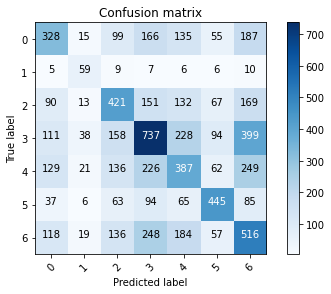

In [20]:
cnf_matrix = confusion_matrix(y_test, yhat_1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6'], normalize=False, title='Confusion matrix')

Confusion Matrix for k = 2, and initial data:

[[410  22 145 199 110  40  59]
 [ 12  58   9   8   4   6   5]
 [170  28 456 184 102  51  52]
 [262  71 296 782 168  65 121]
 [231  43 214 314 281  40  87]
 [ 87  16 132 176  75 285  24]
 [218  37 213 335 164  57 254]]


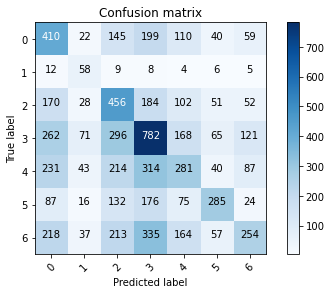

In [21]:
cnf_matrix = confusion_matrix(y_test, yhat_2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6'], normalize=False, title='Confusion matrix')

Confusion Matrix for k = 1, and reduced data:

[[268  10 103 223 162  73 146]
 [  9  45   7  19   6   6  10]
 [114  13 312 211 141  98 154]
 [235  22 217 566 293 129 303]
 [165  13 131 280 318 111 192]
 [ 63  11  85 135  87 335  79]
 [162  14 133 333 198 108 330]]


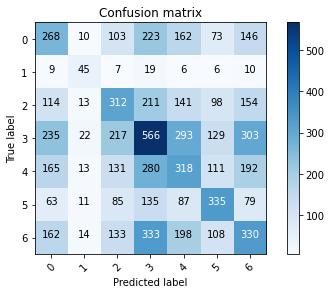

In [22]:
cnf_matrix = confusion_matrix(y_test_2, yhat_1_2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6'], normalize=False, title='Confusion matrix')

Confusion Matrix for k = 2, and reduced data:

[[268  10 103 223 162  73 146]
 [  9  45   7  19   6   6  10]
 [114  13 312 211 141  98 154]
 [235  22 217 566 293 129 303]
 [165  13 131 280 318 111 192]
 [ 63  11  85 135  87 335  79]
 [162  14 133 333 198 108 330]]


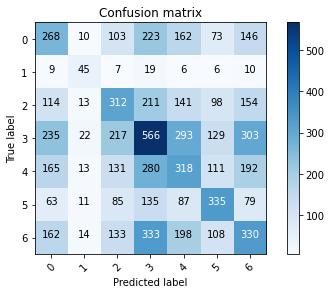

In [23]:
cnf_matrix = confusion_matrix(y_test_2, yhat_2_2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6'], normalize=False, title='Confusion matrix')

**CCR** for each method:

In [37]:
print("CCR for k = 1, initial data:", accuracy_score(y_test, yhat_1))
print("CCR for k = 2, initial data:", accuracy_score(y_test, yhat_2))
print("CCR for k = 1, reduced data:", accuracy_score(y_test_2, yhat_1_2))
print("CCR for k = 2, reduced data:", accuracy_score(y_test_2, yhat_2_2))

CCR for k = 1, initial data: 0.40303705767623293
CCR for k = 2, initial data: 0.3519086096405684
CCR for k = 1, reduced data: 0.3028698801894678
CCR for k = 2, reduced data: 0.3028698801894678


As we saw from the above results, when we use the initial data, the program takes so much to run, but according to the confusion matrix and the accuracy score, the results are more accurate. But when using pca, the program beacomes much faster, but the accuracy is a little bit lower.

PART 4:
pca with **different num of components**:

In [33]:
from sklearn.metrics import accuracy_score
accuracy = []
for i in range (100):
    num_components = i+1
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    eigenvalue_subset = sorted_eigenvalues[0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose(),images_mean_centered.transpose()).transpose()
    df_reduced = pd.DataFrame(X_reduced)
    Xtrain, Xtest, ytrain, ytest = train_test_split(df_reduced, label, test_size = 0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(Xtrain, ytrain)
    yhat = knn.predict(Xtest)
    accuracy.append(accuracy_score(ytest, yhat))

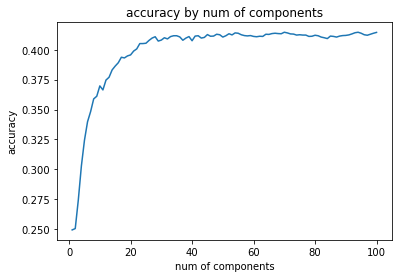

In [36]:
x = np.arange(1,101)
plt.plot(x,accuracy)
plt.xlabel("num of components")
plt.ylabel("accuracy")
plt.title("accuracy by num of components")
plt.show()

